In [ ]:
from google.colab import files
uploaded = files.upload()
import io

Saving preprocessed_data.csv to preprocessed_data.csv


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import random
from sklearn import tree

from sklearn import linear_model
logr = linear_model.LogisticRegression(n_jobs =-1,solver = 'lbfgs', max_iter=500)

In [ ]:
df = pd.read_csv(io.StringIO(uploaded['preprocessed_data.csv'].decode('utf-8')))

df = df.iloc[1:]

# Split dataset

y = df['target']
X = df[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']]

X_train = X[89:]
X_test = X[:89]
y_train = y[89:]
y_test = y[:89]

In [ ]:
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
scores = cross_val_score(logr, X, y, cv=10, scoring='accuracy')
print(scores)

[0.63333333 0.66666667 0.56666667 0.66666667 0.56666667 0.5
 0.51724138 0.65517241 0.48275862 0.65517241]


In [ ]:
iter = [100,250,500,750,1000,1500,2000,2500,5000]
k_scores = []
for k in range(len(iter)):
    logr = linear_model.LogisticRegression(n_jobs =-1,solver = 'lbfgs', max_iter=iter[k])
    scores = cross_val_score(logr, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.594367816091954, 0.6212643678160918, 0.5910344827586206, 0.5978160919540231, 0.5777011494252874, 0.5811494252873564, 0.5844827586206895, 0.5811494252873562, 0.5947126436781609]


Text(0, 0.5, 'Cross-Validated Accuracy')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


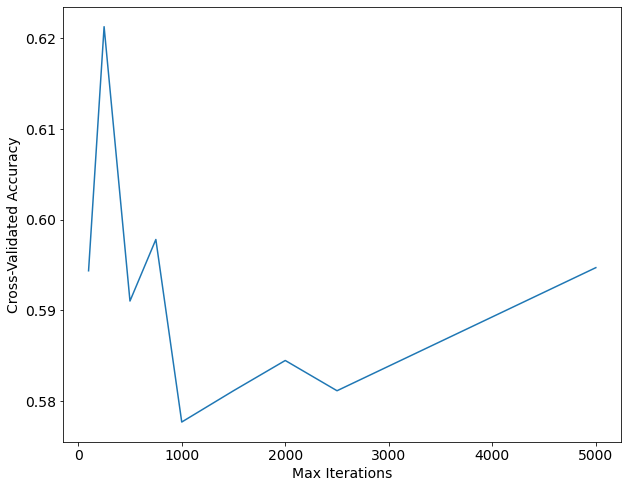

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 14}

plt.rc('font', **font)
plt.figure(figsize = [10,8])
plt.plot(iter, k_scores)
plt.xlabel('Max Iterations')
plt.ylabel('Cross-Validated Accuracy')